# Description

In this notebook you'll find a way to download the data.  
Both data with jet and without are downloaded here and are stored in the previously defined folder : data1 and data0 respectively.  
The steps are the following :  
- Importing csv file that contain the date and the cutout wanted for the image
- Making the request to the JSOC server for the wanted duration (30 images)
- Getting the numpy array from the requested files
- Transforming the array to perform a MaxPool2D (convolution over the image to deacrease its size from 500x500 to 166x166)
- Storing the image into a numpy array using a compressed version  


**Somes infos :**  
`Total number of events` = 1766  
`Downloading rate` : 2mins / event --> total = 59 hours (2,5 days !!!!)  
`File data storage` = 900 Ko  
`Total storage` = 1,6 Go   

Problem : Some event, when requesting the files, found only 29 files and not 30 ? why ?  
   idk maybe a loss in the jsoc database... !!!Events dates are overlapping
   

# Import functions and libraries

In [2]:
import pandas as pd
import numpy as np
import os

from functions_AIA import *

# Run AIA requests

## First the data with jet (data1)

In [5]:
data1=load_data()
num_images=30
jsoc_email="adrien.joliat@epfl.ch"

events_list = data1.iloc[125:126]
a=0

for i in events_list.index:
    a+=1
    files = get_images(data1.iloc[i], num_images, jsoc_email) # selects data line i
    # "files" is (class <parfive>) and contains N <HDUList> objects (where N is the nb of images in the sequence) 
    # that we open as "f". The attribute f.data returns a numpy array in our case, bc the data is an image.
    # sequence_array is a 3D array of shape (166, 166, N) which contains all the pixel values for one line of data (~ 1 event)
    sequence_array = array_file(files) #torch array of the whole sequency event

    #Save the array
    np.savez_compressed("./data1/"+str(i)+".npz" , sequence_array)
    
    #Remove images
    for j in range(len(files)):
        os.remove(files[j])

    # Check the size of final array
    print(f"Download = {a}/{len(events_list.index)} and array ={sequence_array.shape}")

Export request pending. [id=JSOC_20231130_2213, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231130_2213, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231130_2213, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231130_2213, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231130_2213, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231130_2213, status=1]
Waiting for 5 seconds...
30 URLs found for download. Full request totalling 6MB


Files Downloaded:   0%|          | 0/30 [00:00<?, ?file/s]

aia.lev1_euv_12s.2011-12-11T234302Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-12-11T234326Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-12-11T234350Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-12-11T234414Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-12-11T234438Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-12-11T234502Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-12-11T234526Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-12-11T234550Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-12-11T234614Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-12-11T234638Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-12-11T234702Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-12-11T234726Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-12-11T234750Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-12-11T234814Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-12-11T234838Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-12-11T234902Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-12-11T234926Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-12-11T234950Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-12-11T235014Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-12-11T235038Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-12-11T235102Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-12-11T235126Z.304.image.fits:   0%|          | 0.00/196k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-12-11T235150Z.304.image.fits:   0%|          | 0.00/199k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-12-11T235214Z.304.image.fits:   0%|          | 0.00/199k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-12-11T235238Z.304.image.fits:   0%|          | 0.00/199k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-12-11T235302Z.304.image.fits:   0%|          | 0.00/199k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-12-11T235326Z.304.image.fits:   0%|          | 0.00/199k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-12-11T235350Z.304.image.fits:   0%|          | 0.00/199k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-12-11T235414Z.304.image.fits:   0%|          | 0.00/199k [00:00<?, ?B/s]

aia.lev1_euv_12s.2011-12-11T235438Z.304.image.fits:   0%|          | 0.00/199k [00:00<?, ?B/s]

Download = 1/1 and array =(166, 166, 30)


## Secondly, data without jet (data0)

In [ ]:
data0=load_data_nojet()
num_images=30
jsoc_email="adrien.joliat@epfl.ch"

events_list = data0.iloc[:1]
a=0
for i in events_list.index:
    a+=1
    files = get_images(data0.iloc[i], num_images, jsoc_email) # selects data line i
    # "files" is (class <parfive>) and contains N <HDUList> objects (where N is the nb of images in the sequence) 
    # that we open as "f". The attribute f.data returns a numpy array in our case, bc the data is an image.
    # sequence_array is a array of shape (166, 166, N) which contains all the pixel values for one line of data (~ 1 event)
    sequence_array = array_file(files) #torch array of the whole sequency event

    #Save the array
    np.savez_compressed("./data0/"+str(i)+".npz" , sequence_array)

    #Remove images
    for j in range(len(files)):
        os.remove(files[j])
    
    # Check the size of final array
    print(f"Download = {a}/{len(events_list.index)} and array ={sequence_array.shape}")

## Access data 

In [ ]:
archive= np.load("./data1/0.npz")
array=archive["arr_0"]

for i in range(30):
    plot_array(array[:,:,i])

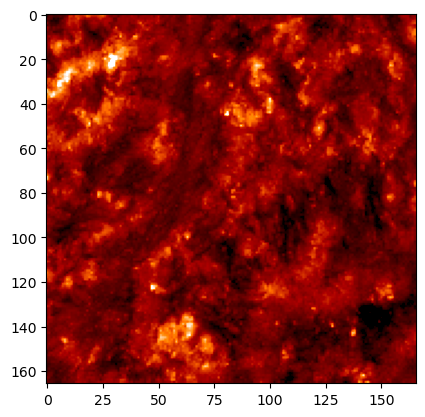

In [8]:
archive= np.load("./data0/0.npz")
array=archive["arr_0"]
plot_array(array[:,:,15])

# Verify Images Shapes

In [6]:
for i in range(125):
    archive= np.load(f"./data1/{i}.npz")
    array=archive["arr_0"]
    #print(array.shape)
    if array.shape!=(166,166,30):
        print(f"The event {i} has not a conform shape : {array.shape}")
    

The event 27 has not a conform shape : (166, 166, 29)
The event 28 has not a conform shape : (166, 166, 27)
The event 30 has not a conform shape : (166, 166, 29)
The event 63 has not a conform shape : (166, 166, 6)
The event 64 has not a conform shape : (166, 166, 5)
The event 65 has not a conform shape : (166, 166, 5)
The event 66 has not a conform shape : (166, 166, 25)
The event 94 has not a conform shape : (166, 166, 6)
The event 95 has not a conform shape : (166, 166, 6)


In [7]:
display(data1.iloc[63:66])
display(data1.iloc[94:96])

,#sjh_ID,date,SOL_event,duration,basepoint_X,std_X,basepoint_Y,std_Y,basepoint_X_longitude,basepoint_Y_latitude,max_height,upper_H,lower_H,avg_width,std_width,sigma,flag
63,sjh_2011-05-27T22_1,2011-05-27T22:10:32.000000,SOL2011-05-27T21:40:29L028C078,14.0,-917.895,0.0,260.182,0.0,-89.0,15.0,53.018991,15.417014,-11.943925,20.855258,0.0,0.399803,10
64,sjh_2011-05-27T22_2,2011-05-27T22:23:32.000000,SOL2011-05-27T21:40:29L028C078,16.0,-921.456,0.0,248.459,0.0,-89.0,15.0,69.916141,18.900390,-14.878338,30.725744,0.0,0.380320,10
65,sjh_2011-05-27T22_3,2011-05-27T22:23:32.000000,SOL2011-05-27T21:40:29L028C078,16.0,-921.456,0.0,248.459,0.0,-89.0,15.0,209.693396,70.140689,-52.559856,24.734475,0.0,0.438476,10


,#sjh_ID,date,SOL_event,duration,basepoint_X,std_X,basepoint_Y,std_Y,basepoint_X_longitude,basepoint_Y_latitude,max_height,upper_H,lower_H,avg_width,std_width,sigma,flag
94,sjh_2011-05-31T21_1,2011-05-31T21:20:32.000000,SOL2011-05-31T21:20:06L059C052,14.0,-49.5695,0.0,590.319,0.0,-3.0,37.0,31.881826,8.436872,-6.671418,21.923077,0.0,0.374722,10
95,sjh_2011-05-31T21_2,2011-05-31T21:33:32.000000,SOL2011-05-31T21:20:06L059C052,14.0,-50.4398,0.0,594.006,0.0,-3.0,37.0,77.085517,23.767576,-18.166383,38.784150,0.0,0.415792,10
